In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from Modules import *
sns.set()
%matplotlib inline

In [2]:
# read the csv & clean up some of the unusual values
df, y = read_data('../default_of_credit_card_clients.xls')
df = proc_cat_df(df)

df.head().T

,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
AGE,24,26,34,37,57
PAY_1,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0
PAY_5,-2,0,0,0,0
PAY_6,-2,2,0,0,0
BILL_AMT1,3913,2682,29239,46990,8617
BILL_AMT2,3102,1725,14027,48233,5670


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from Modules import *
sns.set()
%matplotlib inline
import imblearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [4]:
X = df.drop(columns = 'Y')
y = df['Y']

In [5]:
df.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,4799.387633,5215.502567,0.221200,0.603733,0.396267,0.352833,0.179500,0.467667,0.455300,0.544700
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,15278.305679,17777.465775,0.415062,0.489129,0.489129,0.477859,0.383777,0.498962,0.498006,0.498006
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,4031.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2019, test_size = .2)

In [8]:
from imblearn.over_sampling import SMOTE

#create my oversampled data to train on
oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [9]:
#Put the oversampled data back into a dataframe
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns = X_train.columns)
y_train_oversampled = pd.Series(y_train_oversampled)

In [10]:
print("X_train_oversampled", X_train_oversampled.shape)
print("X_test",X_test.shape)
print("y_train_oversampled",y_train_oversampled.shape)
print("y_test",y_test.shape)

X_train_oversampled (37308, 27)
X_test (6000, 27)
y_train_oversampled (37308,)
y_test (6000,)


# Logistic Regression 

In [11]:
clfLR = LogisticRegression(solver = 'lbfgs',
                           max_iter = 500,
                          random_state = 2019)

i = clfLR.fit(X_train_oversampled,y_train_oversampled)

predLR = clfLR.predict(X_test)

In [12]:
# Cross Validation
cross_val_score_LR = cross_val_score(clfLR, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LR.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLR).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLR).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLR).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLR).round(2))

cross_val_score:  0.78
precision score is  0.29
recall_score is  0.7155
f1 score is  0.409
ROC AUC is  0.61


In [13]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clfLR, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.0


# SVC

In [14]:
clfSVC = SVC(kernel = 'rbf',
             gamma = 'scale',
                random_state = 2019)

p = clfSVC.fit(X_train_oversampled,y_train_oversampled)

predSVC = clfSVC.predict(X_test)

In [15]:
# Cross Validation
cross_val_score_SVC = cross_val_score(clfSVC, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_SVC.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predSVC).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predSVC).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predSVC).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predSVC).round(2))

cross_val_score:  0.78
precision score is  0.29
recall_score is  0.6915
f1 score is  0.404
ROC AUC is  0.61


In [16]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(p, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.0


# Kneighbours


In [17]:
clfKNN = KNeighborsClassifier(n_neighbors = 3)
clfKNN.fit(X_train_oversampled,y_train_oversampled)

predKNN = clfKNN.predict(X_test)

In [18]:
# Cross Validation
cross_val_score_KNN = cross_val_score(clfKNN, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_KNN.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predKNN).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predKNN).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predKNN).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predKNN).round(2))

cross_val_score:  0.74
precision score is  0.27
recall_score is  0.4705
f1 score is  0.344
ROC AUC is  0.56


# Random Forest Classifier

In [19]:
clfRF = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 100,
                              verbose = False,
                              random_state = 0)

r = clfRF.fit(X_train_oversampled,y_train_oversampled)

predRF = clfRF.predict(X_test)

In [20]:
# Cross Validation
cross_val_score_RF = cross_val_score(clfRF, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_RF.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predRF).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predRF).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predRF).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predRF).round(2))

cross_val_score:  0.82
precision score is  0.59
recall_score is  0.4488
f1 score is  0.511
ROC AUC is  0.68


In [21]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(r, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.4717615268280517


# light gbm 

In [22]:
clfLGB = LGBMClassifier(n_estimators = 100,
                           learning_rate = .2,
                           random_state = 0)

clfLGB.fit(X_train_oversampled,y_train_oversampled)

predLGB = clfLGB.predict(X_test)

In [23]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfLGB, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLGB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLGB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLGB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLGB).round(2))

cross_val_score:  0.81
precision score is  0.64
recall_score is  0.4047
f1 score is  0.495
ROC AUC is  0.67


# Cat Boost Classifier

https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html

In [24]:
clfCB = CatBoostClassifier(iterations = 100,
                           learning_rate = .2,
                           depth = 5,
                           eval_metric = 'AUC',
                           random_seed = 0)

clfCB.fit(X_train_oversampled,y_train_oversampled)

predCB = clfCB.predict(X_test)

0:	total: 222ms	remaining: 22s
1:	total: 297ms	remaining: 14.5s
2:	total: 376ms	remaining: 12.1s
3:	total: 463ms	remaining: 11.1s
4:	total: 536ms	remaining: 10.2s
5:	total: 608ms	remaining: 9.53s
6:	total: 694ms	remaining: 9.22s
7:	total: 779ms	remaining: 8.96s
8:	total: 856ms	remaining: 8.66s
9:	total: 944ms	remaining: 8.49s
10:	total: 1.04s	remaining: 8.46s
11:	total: 1.14s	remaining: 8.33s
12:	total: 1.22s	remaining: 8.15s
13:	total: 1.3s	remaining: 7.99s
14:	total: 1.4s	remaining: 7.95s
15:	total: 1.49s	remaining: 7.84s
16:	total: 1.58s	remaining: 7.71s
17:	total: 1.68s	remaining: 7.65s
18:	total: 1.76s	remaining: 7.52s
19:	total: 1.85s	remaining: 7.4s
20:	total: 1.94s	remaining: 7.29s
21:	total: 2.03s	remaining: 7.19s
22:	total: 2.11s	remaining: 7.06s
23:	total: 2.19s	remaining: 6.95s
24:	total: 2.28s	remaining: 6.85s
25:	total: 2.37s	remaining: 6.73s
26:	total: 2.46s	remaining: 6.66s
27:	total: 2.55s	remaining: 6.55s
28:	total: 2.64s	remaining: 6.46s
29:	total: 2.74s	remaining: 6

In [25]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfCB, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predCB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predCB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predCB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predCB).round(2))

0:	total: 49.9ms	remaining: 4.94s
1:	total: 96.5ms	remaining: 4.73s
2:	total: 146ms	remaining: 4.71s
3:	total: 192ms	remaining: 4.6s
4:	total: 255ms	remaining: 4.85s
5:	total: 301ms	remaining: 4.71s
6:	total: 349ms	remaining: 4.64s
7:	total: 399ms	remaining: 4.59s
8:	total: 444ms	remaining: 4.49s
9:	total: 489ms	remaining: 4.4s
10:	total: 536ms	remaining: 4.33s
11:	total: 582ms	remaining: 4.27s
12:	total: 630ms	remaining: 4.22s
13:	total: 678ms	remaining: 4.16s
14:	total: 727ms	remaining: 4.12s
15:	total: 773ms	remaining: 4.06s
16:	total: 820ms	remaining: 4s
17:	total: 880ms	remaining: 4.01s
18:	total: 934ms	remaining: 3.98s
19:	total: 981ms	remaining: 3.92s
20:	total: 1.03s	remaining: 3.88s
21:	total: 1.08s	remaining: 3.82s
22:	total: 1.12s	remaining: 3.76s
23:	total: 1.17s	remaining: 3.7s
24:	total: 1.21s	remaining: 3.64s
25:	total: 1.26s	remaining: 3.59s
26:	total: 1.31s	remaining: 3.54s
27:	total: 1.35s	remaining: 3.48s
28:	total: 1.41s	remaining: 3.45s
29:	total: 1.46s	remaining: 

# Decision Tree

In [26]:
# Create Decision Tree classifer object
clfTR = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfTR = clfTR.fit(X_train_oversampled,y_train_oversampled)

#Predict the response for test dataset
y_pred = clfTR.predict(X_test)

In [27]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfTR, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, y_pred).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, y_pred).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, y_pred).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, y_pred).round(2))

cross_val_score:  0.74
precision score is  0.38
recall_score is  0.4279
f1 score is  0.4
ROC AUC is  0.62


In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4710
           1       0.38      0.43      0.40      1290

   micro avg       0.72      0.72      0.72      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.72      0.73      6000



In [29]:
feature_cols = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married',"1"]

In [30]:
feature_cols

['LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX_Female',
 'SEX_Male',
 'EDUCATION_Graduate School',
 'EDUCATION_Other',
 'EDUCATION_University',
 'MARRIAGE_Married',
 '1']

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clfTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())


<Figure size 432x288 with 0 Axes>

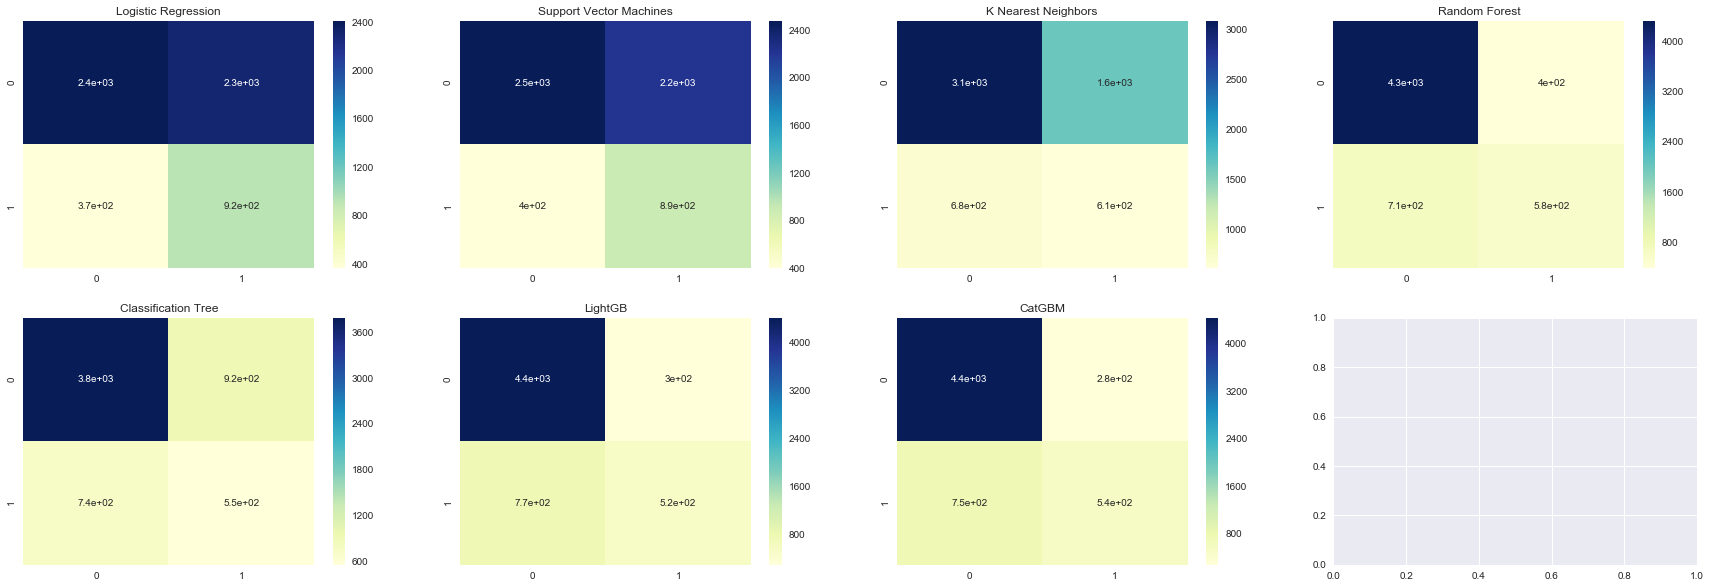

In [34]:
# Confusion Matrix
cmLR = confusion_matrix(y_test, predLR)
cmSVC = confusion_matrix(y_test, predSVC)
cmKNN = confusion_matrix(y_test, predKNN)
cmRF = confusion_matrix(y_test, predRF)
cmTR = confusion_matrix(y_test, y_pred)
cmLGB = confusion_matrix(y_test, predLGB)
cmCB = confusion_matrix(y_test, predCB)

# Confusion Matrix List
cmList = [cmLR, cmSVC,cmKNN, cmRF,cmTR,  cmLGB, cmCB]
cmTitle = ['Logistic Regression','Support Vector Machines','K Nearest Neighbors','Random Forest',"Classification Tree", 'LightGB','CatGBM',None]
i = 0
plt.figure()
fig, ax = plt.subplots(2,4, num = 6, figsize = (30,10))
for cm in cmList:
    i += 1
    plt.subplot(2,4,i)
    plt.title(cmTitle[i-1])
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.show();